## Capstone Project 1: Predicting Success in Kickstarter Campaigns

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kickstarter is a funding platform for creative projects. When creative groups, companies, or individuals have an idea, a clear plan and a final funding goal, they can submit their projects to the Kickstarter platform in order to garner public support and funding. The Kickstarter platform provides a space where where campaigns can both ask for funding donations, and provide incentives and rewards to those who pledge funds to the project.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Kickstarter platform is funded by fees collected from each donation, and from the overall funding amount when a campaign is successful. Kickstarter applies a 5% fee to any successful campaigns, and collects a 3-5% payment processing fee per donation, depending on the donation amount. If a campaign is not successful and does not reach their funding goal, Kickstarter does not collect the standard 5% fee. Therefore, in order for Kickstarter to continue their success, and increase their profits, they must host successful campaigns that reach or exceed their funding goal. Currently, successful Kickstarter campaigns are estimated at 35% of total campaigns, while failed campaigns are closer to 52%.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;An analysis of successful Kickstarter campaigns will address metrics for campaigns that reach and exceed their funding goals. This includes the category of campaign, rewards/incentives offered, funding goal, funding time frame, and campaign description.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The ability to predict a successful Kickstarter campaign will be of great benefit to both Kickstarter as a company, and to companies and creators who launch campaigns on their website. Kickstarter has an inherent intrerest in running successful campaigns because of their fee structure, and their overall profits as a company. Additionally, competition from other crowdfunding platforms are gaining popularity and Kickstarter will need remain competitive in offering services and exposure to clients that will lead to succesful campaign outcomes.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Companies and creators who are launching campaigns also have an inherent interest in understanding the factors that create a successful campaign. Having a campaign or project reach or exceed funding status could alter the trajectory of a product or idea. Alternatively, campaigns and projects that end up failing to meet their funding goals could end up on life support.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By analyzing trends in successful campaigns, Kickstarter will be able to determine which campaigns are more likely to reach or exceed funded status. Armed with this data insight, Kickstarter will be able to make data driven, impactful decisions in regards to
    - Services offered to clients
    - Fees that are collected from clients and from contributors, 
    - Campaign guidelines and recommendations


### 5.4 Data Wrangling

The dataset that was used for analysis was provided in one .csv file, obtained from [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv). At first glance, the data is fairly clean containing 15 columns with 378,661 rows of data. Each Kickstarter campaign is represented by one row of data including the campaign name, the main category that the campaign falls under, the currency type that pledges are converted to, the campaign deadline, funding goal, the state of the campaign, how many backers supported the campaign, what country the campaign originated from, and then two columns that are conversions of the pledged amount column converted to USD. 

To start off the data cleaning process, Python packages that will be utilized are imported and the data is read into a pandas data frame. The packages that I believe will be the most useful in the cleaning process are pandas and numPy. 

In [133]:
#import packages
import pandas as pd
import numpy as np
from scipy import stats
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [134]:
#read in csv
df = pd.read_csv(r'/Users/kellipeluso/Desktop/Springboard/ks-projects-201801.csv', encoding = 'latin')

I began the cleaning process by determining whether any data was duplicated. Each Kickstarter campaign is assigned a campaign ID, and I proceeded to work on deduplication based off of this column. In order to check for duplicate rows, I created a new data frame that would contain any potential duplicates. I created this data frame using df.duplicated() and then printing the shape of the new data frame. There were no duplicate rows that needed to be removed in the original data frame.

In [135]:
#check for any duplicate rows
duplicate_rows_df = df[df.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


To get a broad overview of all of the column names, I printed the column values, and examined whether there were any null values in any column. There were 4 null values in the name column, and 3797 null values in the usd pledged column. The 4 null names are for campaigns that were cancelled or potentially created in error without a campaign name. Upon further inspection and research, the usd pledged column and usd_pledged_real column are similar in that their existence had a common goal. The two columns were meant to convert the pledged entirely to USD, as some campaigns pledges were in other countries currency. The first column, usd pledged, was created by Kickstarter, and looks as though it did not completely convert all pledges successfully. Alternatively, the usd_pledged_real column contains all correctly converted values. Because of this, I decided to remove the usd pledged column from the data frame, and create a new data frame called clean_df, using df.drop on the usd pledged column. To double check that everything went correctly, the column names and data frame shape are reprinted confirming that usd pledged has been removed.

In [136]:
#examine column names
print ("column names: ", df.columns.values)

column names:  ['ID' 'name' 'category' 'main_category' 'currency' 'deadline' 'goal'
 'launched' 'pledged' 'state' 'backers' 'country' 'usd pledged'
 'usd_pledged_real' 'usd_goal_real']


In [137]:
#check for columns with row values
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [138]:
#drop usd pledged column
clean_df = df.drop('usd pledged', axis = 1)

In [139]:
#re-examine column names after usd pledged is dropped
print ("column names: ", clean_df.columns.values)

column names:  ['ID' 'name' 'category' 'main_category' 'currency' 'deadline' 'goal'
 'launched' 'pledged' 'state' 'backers' 'country' 'usd_pledged_real'
 'usd_goal_real']


In [140]:
#examine shape of new cleaned dataset
clean_df.shape

(378661, 14)

Now that we have our clean data frame, it can be explored using .describe(), .head() and .info(). From here, we can see that the majority of our data is made up of non-null objects, while the other portion is made up of floats and ints. 

In [141]:
#high overview of each column
clean_df.describe()

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08


In [142]:
#examine the first 10 rows of the dataset
clean_df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,65000.00


In [143]:
#examine information about column datatypes
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 40.4+ MB


Most of our columns are objects, and would not have an outlier associated with them. In order to identify outliers in the appropriate columns (goal, pledged, usd_pledged_real, usd_goal_real) the datatypes are examined once again in order to remove the object columns. After object columns are removed there are only 6 columns left. From these 6 columns, a zscore over 3 is calculated, and any outliers identified are rejected. After the outliers are rejected, the data frame is left with 375,784 rows in comparison to the original 378,661. This will be helpful to take into account when statistical analysis is completed.

In [144]:
#identify outliers
print ("data types: \n", clean_df.dtypes)
print ("shape before :", clean_df.shape)
clean_df_num = clean_df.select_dtypes(exclude=['object'])
print ("shape after excluding object columns: ", clean_df_num.shape)

data types: 
 ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd_pledged_real    float64
usd_goal_real       float64
dtype: object
shape before : (378661, 14)
shape after excluding object columns:  (378661, 6)


In [145]:
#identify and reject outliers outside of zscore of 3
clean_df_zscore = clean_df_num[(np.abs(stats.zscore(clean_df_num))<3).all(axis=1)]
print ("shape after rejecting outliers: ", clean_df_zscore.shape)

shape after rejecting outliers:  (375784, 6)


It is important to identify outliers in order to account for possible statistical errors in the future. Outliers can skew statistical measures such as means and medians, and will need to be further considered when designing the predictive model. For data exploration purposes, the outliers continue to remain in the dataset at this time.

### 7.2 Data Storytelling

#### Top Kickstarter Campaign Main Categories

As previously stated, the ability to predict a successful Kickstarter campaign will be of huge benefit to both Kickstarter and to companies and groups who use their services to raise funds for their projects. The success of Kickstarter campaigns means continued success and profitability for the Kickstarter platform, and successful campaigns are given the opportunity to launch their innovative products and ideas - which at times maybe didn't seem possible through traditional funding. It's important to begin looking at any potential relationships between the characteristics of successful campaigns and unsuccessful campaigns. What differentiates them? Is it enough to just put a project on Kickstarter and see what happens, or are there outside factors that need to be taken into account or at least discussed? 

In [146]:
#Identify the top ten main campaign categories 
clean_df['main_category'].value_counts().head(10)

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Name: main_category, dtype: int64

Visually, this chart represents what we know to be true about the data at first glance. This ranking is based off of the number of campaigns in each category. The top 10 main categories do not increase drastically between Fashion and Games, however there is an identified steep increase from Theater to Fashion, and from Publishing to both Music and Film & Video. The top ten main categories are calculated from the sum of campaigns that fall under each category.

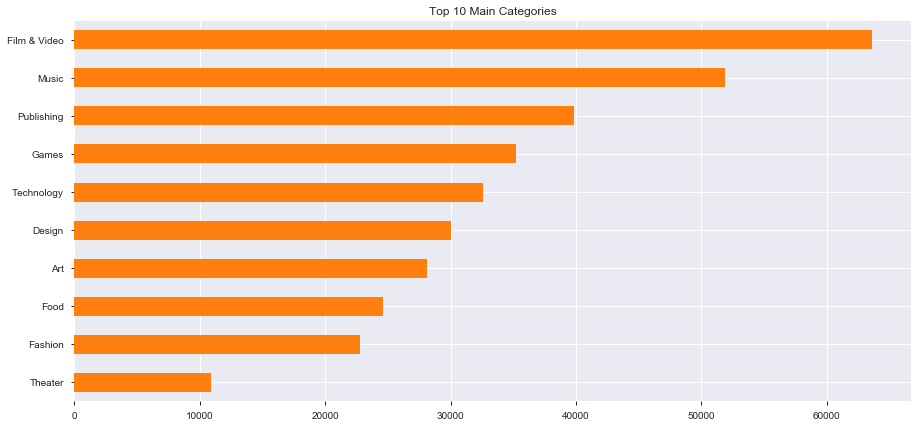

In [147]:
#Visualize the top ten main kickstarter campaign categories, based on count of campaigns in each category
clean_df.main_category.value_counts()[:10].sort_values().plot(kind='barh', title='Top 10 Main Categories', color = 'tab:orange',figsize=(15, 7))

Intrestingly, when we look at the top 10 main categories based on the sum of pledged USD, the data provides interesting insight. Although games are the 4th ranked main category in terms of number of campaigns, it far out paces Film & Video. Campaigns with the main category games brought in \\$741,321,067 in pledges alone from 35,231 campaigns. For Kickstarter, this accounts to a \\$37,066,053.35 profit from the successful Game campaigns, not accounting for additional fees collected at the time of each pledge - that's a lot of money! 
Design is not far behind Games, bringing in \\$734,215,606 in pledges for 30,070 games.
This seems to be related to the amount of money needed to fund campaigns for categories such as Games and Technology.

In [148]:
clean_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
usd_main = clean_df.groupby('main_category')['usd_pledged_real'].sum().sort_values(ascending = False)
print(usd_main)

main_category
Games           741321067
Design          734215606
Technology      688867435
Film & Video    391548419
Music           200313812
Publishing      133572081
Fashion         130332553
Food            125804297
Art              90677370
Comics           71516996
Theater          43715226
Photography      38500334
Crafts           14383363
Dance            13010366
Journalism       12437163
Name: usd_pledged_real, dtype: int64


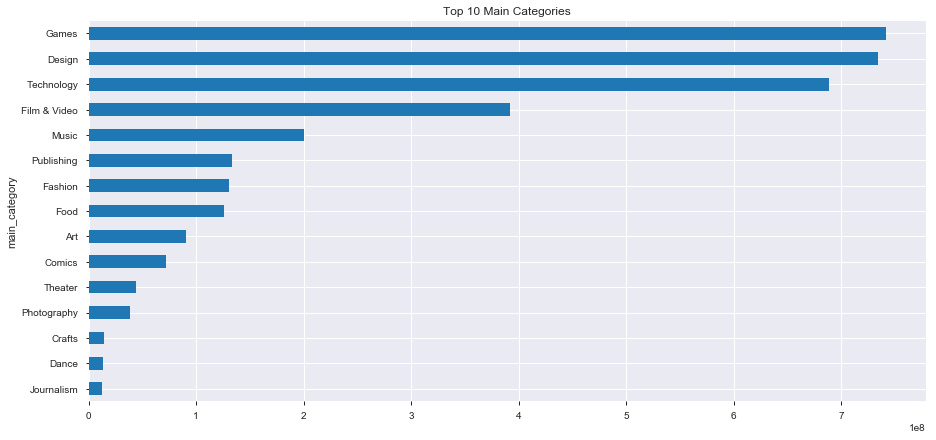

In [149]:
#top 10 campaign categories by total sum of money pledged
clean_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
clean_df.groupby('main_category')['usd_pledged_real'].sum().sort_values(ascending = True).plot(kind='barh', title='Top 10 Main Categories', color = 'tab:blue',figsize=(15, 7))

It is not surprising to see that for each category, successful campaigns were the most lucrative. Failed campaigns appear to be the second most lucrative campaign state, while live, suspended and undefined have the lowest pledge amounts.

In [150]:
#top 10 campaign categories by total sum of money pledged for each campaign state
clean_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
clean_df.groupby(['main_category','state'])['usd_pledged_real'].sum().sort_index(ascending = False)

main_category  state     
Theater        undefined         2621
               suspended         1195
               successful    39027485
               live            129034
               failed         3633313
                               ...   
Art            suspended        54835
               successful    80244909
               live            463699
               failed         8831025
               canceled       1082902
Name: usd_pledged_real, Length: 85, dtype: int64

After determining breaking down the main categories by the campaign state, we were able to find both the pledge amount by campaign state in each main category (as shown above), and the total number of campaigns by state in each main category. In the future, we will compare the success and failure rates of each campaign main category to help determine main categories at a higher financial risk.

In [151]:
# a look at the status of campaigns based on their main category
# do certain campaign categories have a higher failure rate than others?
main_state = clean_df.groupby('main_category')['state'].value_counts()
print(main_state)


main_category  state     
Art            failed        14131
               successful    11510
               canceled       2222
               live            194
               suspended        96
                             ...  
Theater        failed         3708
               canceled        608
               live             41
               suspended        21
               undefined         1
Name: state, Length: 85, dtype: int64


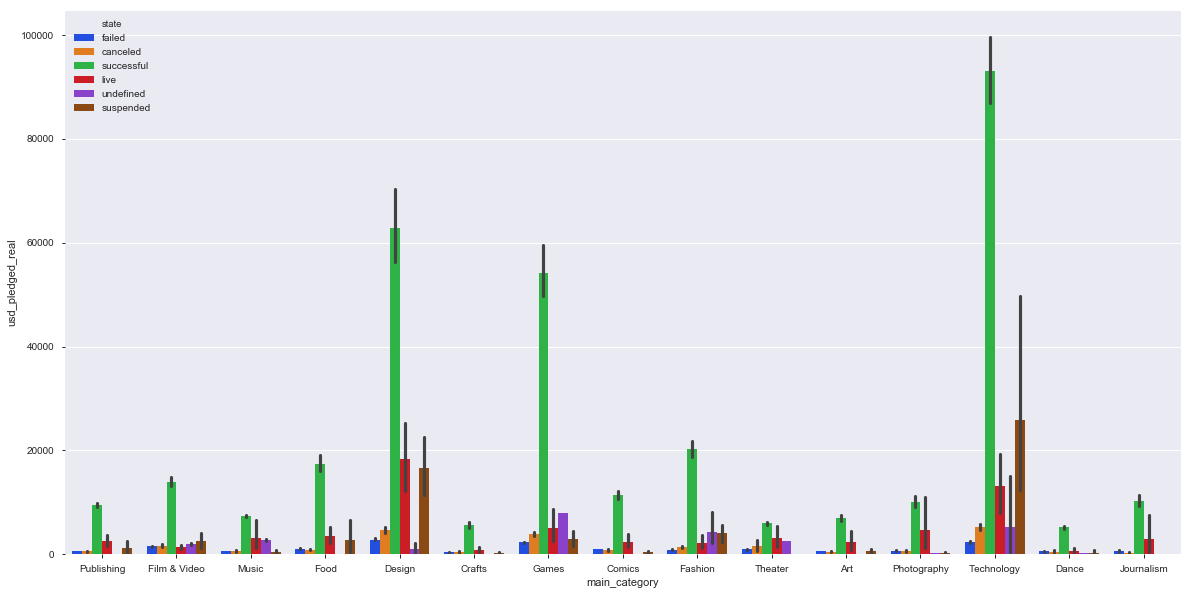

In [162]:
# visualization of the main categories with their total pledged USD by the campaign state
clean_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
fig, ax = plt.subplots(figsize=(20,10))
usd_state = sns.barplot(x='main_category', y="usd_pledged_real", hue="state", data=clean_df, palette="bright", ax=ax)
plt.show()

#### Sky is the Limit

An overview of the Kickstarter campaign campaigns seek funding ranging anywhere from \\$0 to \\$20,000,000, however the average campaign goal is \\$49080. With conversions for different currencies already taken into account, total pledges for campaigns range anywhere from $0 to a high of \\$20,338,986. On average, campaigns end up raising \\$9058 total funding regardless of their eventual success or failure.


In [153]:
#explore the campaign goal data by identifying min/max/mean
goal_max = clean_df['goal'].max()
goal_min = clean_df['goal'].min()
goal_mean = clean_df['goal'].mean()
print('Campaign goal amounts range from $', goal_min, ' to $', goal_max,'.', 'The average campaign goal is $', goal_mean)
#explore the campaign goal data by identifying min/max/mean
pledge_max = clean_df['usd_pledged_real'].max()
pledge_min = clean_df['usd_pledged_real'].min()
pledge_mean = clean_df['usd_pledged_real'].mean()
print('Campaign pledge amounts range from $', pledge_min, ' to $', pledge_max,'.', 'The average pledge amount is $', pledge_mean)

Campaign goal amounts range from $ 0.01  to $ 100000000.0 . The average campaign goal is $ 49080.79152056854
Campaign pledge amounts range from $ 0  to $ 20338986 . The average pledge amount is $ 9058.804809579016


#### Campaign Duration

After exploring some of the campaign data, it is important to add a column that shows the duration of a campaign to contextualize how much time it has taken for successful campaigns to reach or surpass their funding goal, or for determining the average length of time of a failed campaign. In order to create a campaign duration column, both the launched and deadline columns are converted to datetime. From there, the campaign_duration column is created and added to clean_df by calculating the difference between launched and deadline. 
Exploration of this new column shows that the minimum campaign duration is only 7 hours and 17 minutes, while the longest campaign duration was 16738 days. Campaigns typically run for an average length of time of 33 days.


In [154]:
#convert the launched date and deadline date to datetime, solve for the duration between the launch date and 
#deadline - drop the hr:mm:ss from the analysis
#sort for the top 10 campaign durations
#create a factorplot for campaign duration, state of campaign, and amount pledged
clean_df['launched'] = pd.to_datetime(clean_df['launched']).dt.date
clean_df['deadline'] = pd.to_datetime(clean_df['deadline']).dt.date
clean_df['campaign_duration'] = clean_df['deadline'] - clean_df['launched']
print(clean_df['campaign_duration'].head(10))
dur_min=clean_df['campaign_duration'].min()
dur_max=clean_df['campaign_duration'].max()
dur_mean=clean_df['campaign_duration'].mean()
print('The shortest campaign duration was',dur_min, ',',' the longest campaign duration was',dur_max,
      '.          The average campaign duration was ',dur_mean)

0   59 days
1   60 days
2   45 days
3   30 days
4   56 days
5   35 days
6   20 days
7   45 days
8   35 days
9   30 days
Name: campaign_duration, dtype: timedelta64[ns]
The shortest campaign duration was 1 days 00:00:00 ,  the longest campaign duration was 16739 days 00:00:00 .          The average campaign duration was  34 days 11:32:46.627669


#### Great Success!

The majority of Kickstarter campaigns end either in failure, or in success. Suprisingly, more Kickstarter campaigns fail than succeed. 197,719 Kickstarter campaigns <b>failed</b>, while 133,956 Kickstarter campaigns <b>succeeded</b>. Now that we've taken a broad look at the state of all Kickstarter campaigns within this dataset, we can zero in on attributes of successful campaigns.

In [155]:
clean_df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

To further analyze attributes of a successful Kickstarter campaign, success_df is created to house all successful campaigns based off of the state column. The state column includes successful, failed, canceled, suspended, live, and undefined as potential options. An examination of successful campaigns reveals the following. Successful Kickstarter campaigns have:
 - An average of 263 backers per campaign
 - Run for an average campaign duration of 31 days
 - Have raised an average of 22670 per campaign 

In [156]:
success = clean_df['state'] == 'successful'
total = clean_df['usd_pledged_real'] >= 0
success_df = clean_df[success & total]

#compare this to the overall backers stats
back_avg = success_df['backers'].mean()
back_min = success_df['backers'].min()
back_max = success_df['backers'].max()

#compare this to the overall campaign duration stats
duration_min = success_df['campaign_duration'].min()
duration_max = success_df['campaign_duration'].max()
duration_mean = success_df['campaign_duration'].mean()

success_min = success_df['usd_pledged_real'].min()
success_max = success_df['usd_pledged_real'].max()
success_mean = success_df['usd_pledged_real'].mean()

print(back_min)
print(back_max)
print(back_avg)

print(duration_min)
print(duration_max)
print(duration_mean)

print(success_min)
print(success_max)
print(success_mean)
pd.options.mode.chained_assignment = None

success_df.sort_values(by=['usd_pledged_real'],ascending=False).head(10)
success_df.shape

success_df['main_category'].value_counts()

0
219382
263.92136223834694
1 days 00:00:00
92 days 00:00:00
32 days 03:45:17.011556
0
20338986
22670.638821702647


Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

In [157]:
#redo datetime for success_df
success_df['launched'] = pd.to_datetime(success_df['launched']).dt.date
success_df['deadline'] = pd.to_datetime(success_df['deadline']).dt.date
success_df['campaign_duration'] = success_df['deadline'] - success_df['launched']

The most successful Kickstarter campaign within this dataset is for <b>Pebble Time - Awesome Smartwatch, No Compromises</b>. Back in 2012, Pebble also had the highest grossing campaign in Kickstarter history with their first project - which ended up being the very first smart watch. <b>Pebble Time - Awesome Smartwatch, No Compromises</b> raised \\$20,338,986. in only 31 days, with 78471 backers. The original campaign goal was \\$500,000. It's very inspiring to see that a company with multiple top campaigns was able to create a technology gadget that so many people now use on a daily basis. From additional research, it seems as though Pebble was able to set the ground work for the tech industry's creation of smart watches - a field now dominated by brands like Apple and Samsung.

To get a better idea of what the most successful campaign categories look like, a catplot demonstrates the total campaign pledges for the top 20 successful Kickstarter campaigns. Similarly to the total dataset (clean_df) technology, games and design have the highest campaign funding

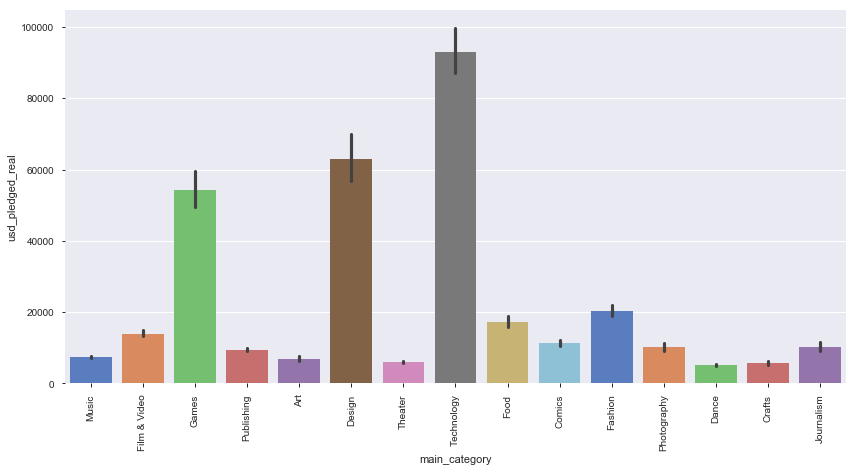

In [158]:
success_camp = sns.catplot('main_category', "usd_pledged_real", data=success_df, kind="bar", order=pd.value_counts(success_df['main_category']).iloc[:20].index,height=6, aspect=2, palette="muted", legend=True)

plt.xticks(rotation=90)
plt.show()

The United States leads countries with the most successful Kickstarter campaigns. Unsurprisingly, the country with the most campaign backers is also the United States, as demonstrated in the stripplot below.

In [159]:
success_df['country'].value_counts()

US      109299
GB       12067
CA        4134
AU        2010
DE         937
FR         908
NL         617
SE         509
ES         492
NZ         448
IT         439
MX         396
DK         360
HK         216
IE         207
CH         187
SG         178
NO         162
BE         152
AT         107
N,0"       105
LU          19
JP           7
Name: country, dtype: int64

Originally, I thought that campaigns with longer durations likely raised the most funds. This did not turn out to be the case. The most lucrative campaigns ran for durations between only 20 and 50 days. This finding could have possible implications for the exploration of future campaign duration limits. For example, if a campaign does not reach x% of its funding goal by the 90 day mark, it would have to be either suspended or cancelled.

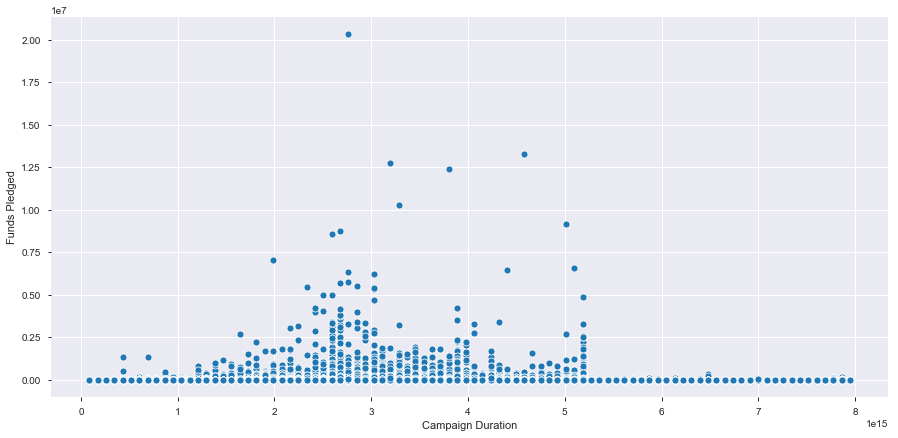

In [160]:
#campaign duration and pledged amounts
cam = pd.to_numeric(success_df['campaign_duration'])
num = pd.to_numeric(success_df['usd_pledged_real'])
fig, ax = plt.subplots(figsize=(15,7)) # define the axes so we can modify them
sns.scatterplot(cam, num,data=success_df,ax = ax) # tell sns to use ax
ax.set_xlabel('') # turn off title
ax.set_ylabel('') # turn off title
plt.xlabel('Campaign Duration')
plt.ylabel('Funds Pledged')
plt.show()


Text(0,0.5,'Total Funds Pledged by Campaign Main Category')

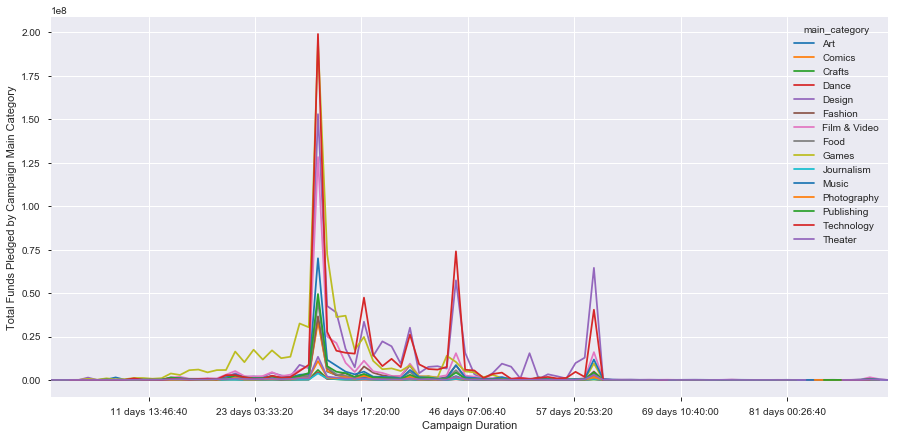

In [161]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
success_df.groupby(['campaign_duration','main_category']).sum()['usd_pledged_real'].unstack().plot(ax=ax)
plt.xlabel('Campaign Duration')
plt.ylabel('Total Funds Pledged by Campaign Main Category')


By grouping the campaigns by main category, we're able to get a more succinct look at which main categories are reaching or exceeding their funding goals in what time period. As previously noted, technology is the most lucrative campaign category for Kickstarter, so it is little surprise that they are more lucrative earlier on than other categories. However, they also continue to lead to higher total funding overtime as well. What I think is the most intriguing from this analysis, is that all campaigns seem to have a starting off period between day one and day 30, where campaigns are possibly just getting off of the ground and getting word out about their project. Pledges and funding spike around or at the 30 day mark, possibly due to a push in exposure from the campaigns team.